In [1]:
import pandas as pd
import numpy as np

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 온라인거래와 관련된 정보
online = pd.read_csv('Onlinesales_info.csv')
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [3]:
cus = pd.read_csv('Customer_info.csv')
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [4]:
dis = pd.read_csv('Discount_info.csv')
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [5]:
mark = pd.read_csv('Marketing_info.csv')
mark

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [6]:
tax = pd.read_csv('Tax_info.csv')
tax

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


## 제공된 이커머스 데이터를 활용하여 고객들을 효과적으로 세분화하고, 
## 그들의 행동 패턴과 구매 경향을 이해함으로써 기업이 더 나은 서비스를 제공할 수 있는 방안을 제시해야 합니다.


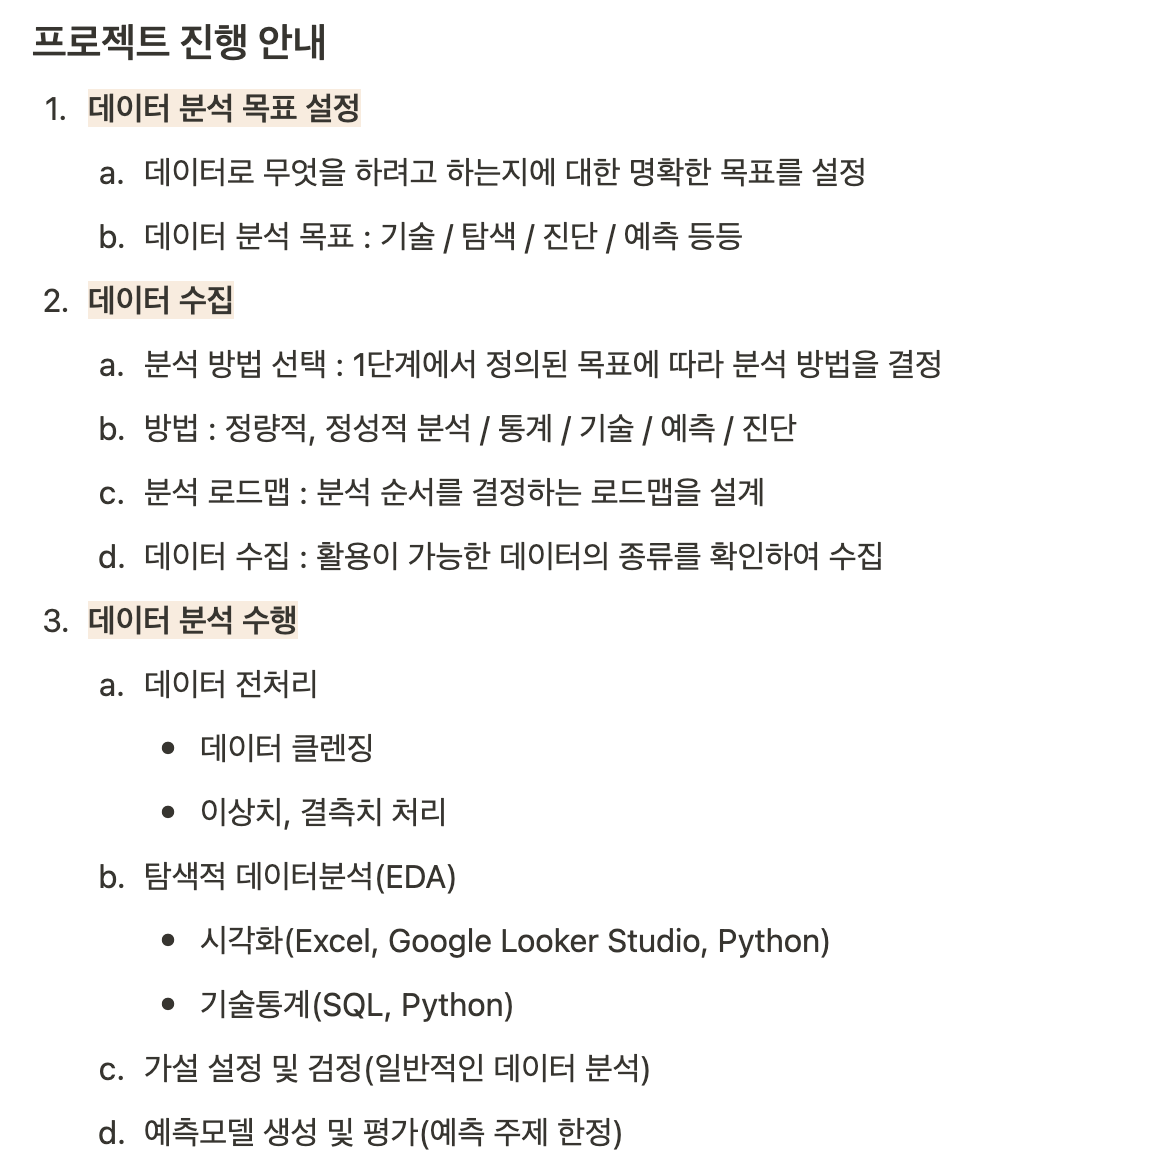

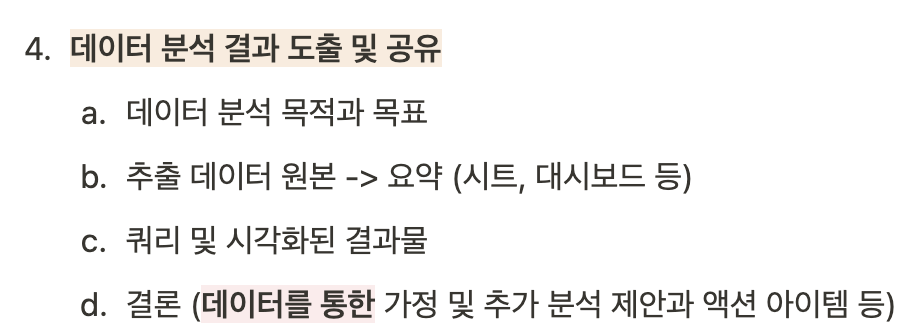

# 데이터 전처리
- 클렌징
- 결측치 처리
- 할 거 없음. 이미 다 정제된 데이터

In [7]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


# 탐색적 데이터 분석(EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [10]:
online['제품카테고리'].value_counts()
# Drinkware : 물잔? 텀블러

제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

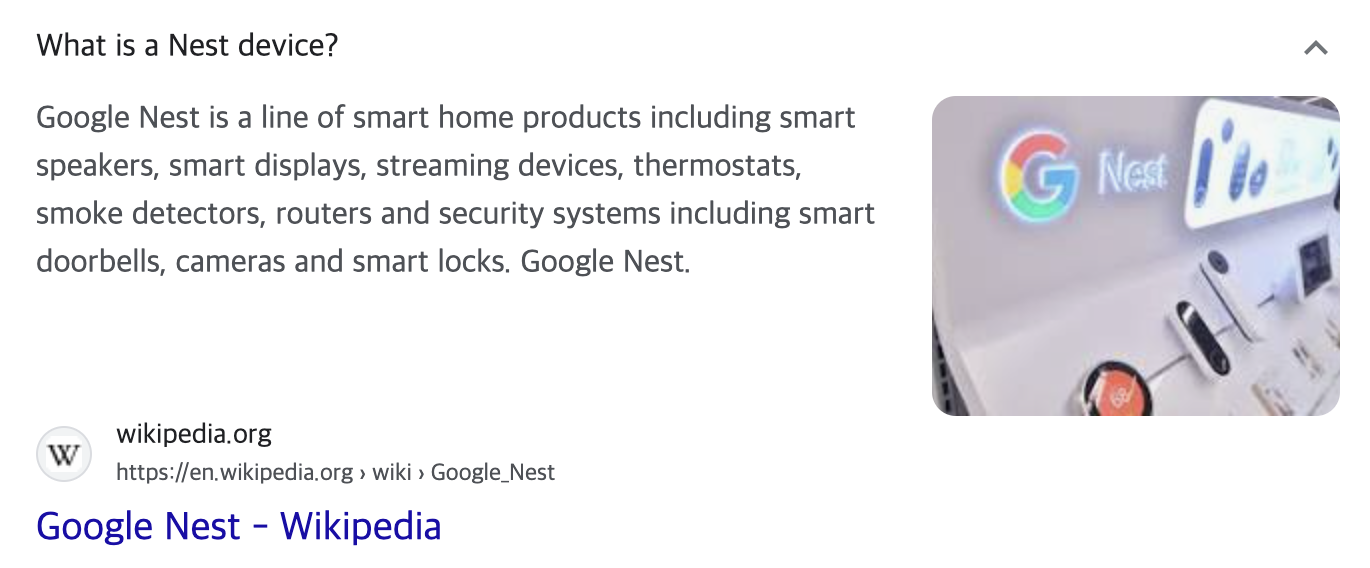

In [11]:
online['쿠폰상태'].value_counts()

쿠폰상태
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

In [12]:
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [13]:
cus['고객지역'].value_counts()

고객지역
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

In [14]:
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [15]:
mark

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [16]:
tax

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [17]:
제품카테고리	수량	평균금액	배송료	쿠폰상태
고객ID	성별	고객지역	가입기간

SyntaxError: invalid syntax (818756502.py, line 1)

In [18]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='고객지역', ylabel='count'>

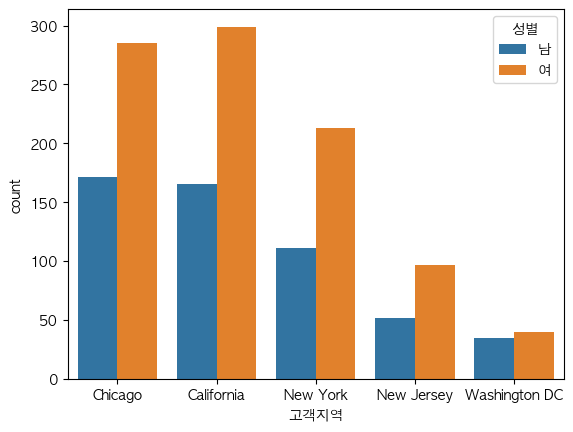

In [19]:
sns.countplot(cus,x='고객지역',hue='성별')
# 모든 지역에서 여성 고객이 더 많음.

In [ ]:
월	제품카테고리	쿠폰코드	할인율

In [20]:
mark

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [21]:
mark['오프라인비용'].mean()

2843.5616438356165

In [22]:
mark['온라인비용'].mean()

1905.8807397260273

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='고객지역', ylabel='Count'>

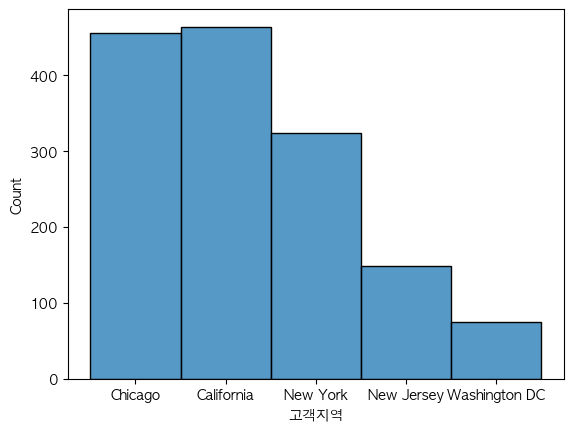

In [23]:
sns.histplot(cus,x='고객지역')

<Axes: xlabel='쿠폰상태', ylabel='count'>

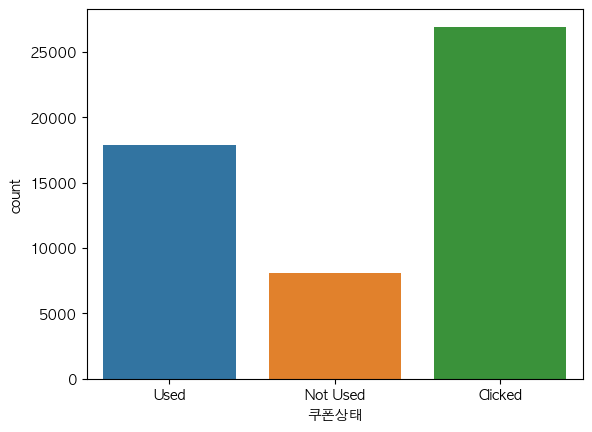

In [24]:
sns.countplot(online,x='쿠폰상태')

In [25]:
dis['쿠폰코드'].value_counts()

쿠폰코드
EXTRA10    8
EXTRA20    8
EXTRA30    8
SALE10     4
ACC20      4
BT20       4
BT30       4
NCA10      4
NCA20      4
NCA30      4
HOU10      4
HOU20      4
HOU30      4
ACC10      4
GC10       4
ACC30      4
WEMP30     4
GC20       4
GC30       4
NJ10       4
NJ20       4
NJ30       4
AND10      4
AND20      4
BT10       4
WEMP10     4
WEMP20     4
SALE20     4
SALE30     4
ELEC10     4
ELEC20     4
ELEC30     4
OFF10      4
OFF20      4
OFF30      4
AIO10      4
AIO20      4
AIO30      4
NOTES10    4
NOTES20    4
NOTES30    4
HGEAR10    4
HGEAR20    4
HGEAR30    4
NE10       4
NE20       4
NE30       4
AND30      4
Name: count, dtype: int64

In [26]:
tax['GST'].value_counts()

GST
0.10    7
0.18    7
0.05    5
0.12    1
Name: count, dtype: int64

In [27]:
online['배송료'].value_counts(normalize=True)

배송료
6.00      0.506405
6.50      0.298900
12.99     0.047842
19.99     0.019689
12.48     0.015078
            ...   
25.27     0.000019
87.70     0.000019
136.09    0.000019
81.70     0.000019
93.52     0.000019
Name: proportion, Length: 267, dtype: float64

In [28]:
online['거래날짜'].value_counts()

거래날짜
2019-11-27    335
2019-07-13    311
2019-08-16    298
2019-08-02    292
2019-07-31    291
             ... 
2019-02-05     41
2019-01-28     39
2019-12-24     35
2019-08-20     32
2019-07-01     27
Name: count, Length: 365, dtype: int64

In [29]:
dis['월'].value_counts(normalize=True)

월
Jan    0.083333
Feb    0.083333
Mar    0.083333
Apr    0.083333
May    0.083333
Jun    0.083333
Jul    0.083333
Aug    0.083333
Sep    0.083333
Oct    0.083333
Nov    0.083333
Dec    0.083333
Name: proportion, dtype: float64

In [30]:
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [31]:
tax

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [32]:
tax.GST.mean()

0.1165

In [33]:
online.head(10)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used
5,USER_1358,Transaction_0003,2019-01-01,Product_0854,Bags,15,5.15,6.5,Used
6,USER_1358,Transaction_0003,2019-01-01,Product_0880,Drinkware,15,3.08,6.5,Not Used
7,USER_1358,Transaction_0003,2019-01-01,Product_0885,Drinkware,15,10.31,6.5,Clicked
8,USER_1358,Transaction_0003,2019-01-01,Product_0898,Drinkware,5,9.27,6.5,Used
9,USER_0190,Transaction_0003,2019-01-01,Product_0914,Office,52,0.98,6.5,Used


In [34]:
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


- 지도로 folium 시각화, 지역별 카테고리별 구매 수량
- 쿠폰 클릭한 기록은 있으나 사용 X, 결제는 성공
- unique한 고객 수는 적다. 동일 날짜라도 구매 카테고리별로 다 기재됨.
- 구매 날짜 사이의 간격. Frequency랑 연결.
- 할인율에 따라 얼마나 구매했나
- 계절별로 어떤 제품군 판매됐나. 구매날짜 차원

# 1. 지도로 folium 시각화, 지역별 카테고리별 구매 수량

In [38]:
online_cus = pd.merge(online, cus, on='고객ID')
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [40]:
online_cus.describe()
# 배송료가 520달러??? 70만원 꼴

,수량,평균금액,배송료,가입기간
count,52924.000000,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630,26.127995
std,20.104711,64.006882,19.475613,13.478285
min,1.000000,0.390000,0.000000,2.000000
25%,1.000000,5.700000,6.000000,15.000000
50%,1.000000,16.990000,6.000000,27.000000
75%,2.000000,102.130000,6.500000,37.000000
max,900.000000,355.740000,521.360000,50.000000


In [47]:
online_cus = online_cus.groupby('고객지역').agg({'수량': 'count','평균금액': 'median','배송료': 'mean'}).reset_index()
online_cus

,고객지역,수량,평균금액,배송료
0,California,16136,16.990,10.718275
1,Chicago,18380,16.990,10.507412
2,New Jersey,4503,16.990,9.496165
3,New York,11173,16.790,10.698711
4,Washington DC,2732,18.515,10.344374


In [46]:
import matplotlib.pyplot as plt

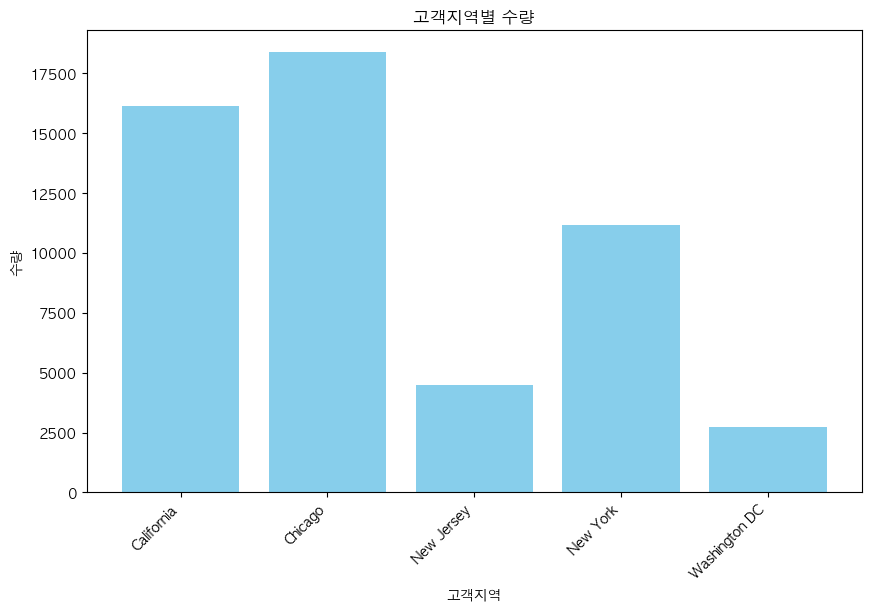

In [48]:
df = pd.DataFrame(online_cus)

plt.figure(figsize=(10, 6))
plt.bar(df['고객지역'], df['수량'], color='skyblue')
plt.title('고객지역별 수량')
plt.xlabel('고객지역')
plt.ylabel('수량')
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.show()
# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC

In [53]:
!pip install geopy

In [66]:
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

data = {
    '고객지역': ['California', 'Chicago', 'New Jersey', 'New York', 'Washington DC'],
    '수량': [16136, 18380, 4503, 11173, 2732]
}

df = pd.DataFrame(data)


# 각 고객지역의 위도와 경도 가져오기
geolocator = Nominatim(user_agent="geoapi")
df['location'] = df['고객지역'].apply(geolocator.geocode)
# geocode로 보면 각 지역의 정보를 가져옴.
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 그 지역정보 에서 위도와 경도 정보를 찾아서 튜플 형태로 저장한다.
# 만약 지역정보를 못 찾았다면 None으로 저장



# 미국 중심 좌표
map_center = [37.7749, -122.4194]

# Folium 지도 생성
customer_region_map = folium.Map(location=map_center, zoom_start=4)

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(customer_region_map)

# 각 지역에 마커 추가
for i in range(len(df)):
    if df['point'].iloc[i] is not None:
        folium.Marker(
            location=df['point'].iloc[i][:2],  # 위도와 경도까지만 쓸것
            popup=f"{df['고객지역'].iloc[i]} 수량: {df['수량'].iloc[i]}",
            tooltip=f"{df['고객지역'].iloc[i]}",
        ).add_to(marker_cluster)

# Folium 지도 저장
customer_region_map.save('customer_quantity_map.html')

In [68]:
df

,고객지역,수량,location,point
0,California,16136,"(California, United States, (36.7014631, -118....","(36.7014631, -118.755997, 0.0)"
1,Chicago,18380,"(Chicago, Cook County, Illinois, United States...","(41.8755616, -87.6244212, 0.0)"
2,New Jersey,4503,"(New Jersey, United States, (40.0757384, -74.4...","(40.0757384, -74.4041622, 0.0)"
3,New York,11173,"(City of New York, New York, United States, (4...","(40.7127281, -74.0060152, 0.0)"
4,Washington DC,2732,"(Washington, District of Columbia, United Stat...","(38.8950368, -77.0365427, 0.0)"


In [67]:
customer_region_map

# 2. 쿠폰 클릭한 기록은 있으나 사용 X, 결제는 성공
- 온라인 거래 정보이므로 애초에 결제는 모두 성공인 건

In [73]:
online_dis = pd.merge(online, dis, on='제품카테고리')
online_dis.head(50)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10
1,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20
2,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30
3,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10
4,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20
5,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jun,ELEC30,30
6,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jul,ELEC10,10
7,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Aug,ELEC20,20
8,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Sep,ELEC30,30
9,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Oct,ELEC10,10


In [76]:
mark
# 마케팅 날짜랑 거래 날짜랑 join해서 날짜별 온라인 비용과 평균금액 비교해보기. 

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


# 3. unique한 고객 수는 적다. 동일 날짜라도 구매 카테고리별로 다 기재됨.

In [78]:
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [83]:
online['고객ID'].value_counts().head(10)

고객ID
USER_0118    695
USER_0736    587
USER_0563    575
USER_1355    572
USER_0643    523
USER_0202    366
USER_0667    315
USER_1358    297
USER_0572    290
USER_0200    261
Name: count, dtype: int64

In [86]:
online_df = {'고객ID':list(online['고객ID']),
             'count':list(online['고객ID'].value_counts())}

cus_df = {'고객ID':list(cus['고객ID']), '고객지역': list(cus['고객지역'])}

In [87]:
online_sale_df = pd.DataFrame(online_df)
customer_df = pd.DataFrame(cus_df)

# '고객ID' 기준으로 조인
result = pd.merge(online_sale_df, customer_df, on='고객ID')
result

ValueError: All arrays must be of the same length